# Mobile Price 

battery_power - Total energy a battery can store in one time measured in mAh

blue - Has bluetooth or not

clock_speed - Speed at which microprocessor executes instructions

dual_sim - Has dual sim support or not

fc - Front Camera mega pixels

four_g - Has 4G or not

int_memory - Internal Memory in Gigabytes

m_dep - Mobile Depth in cm

mobile_wt - Weight of mobile phone

Определяем цену исходя из характеристик

In [42]:
import pandas
df = pandas.read_csv("mobiles.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [44]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [45]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [46]:
taglist = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']
X = df[taglist]
y = df['price_range']

In [47]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


array([[<AxesSubplot:xlabel='battery_power', ylabel='battery_power'>,
        <AxesSubplot:xlabel='blue', ylabel='battery_power'>,
        <AxesSubplot:xlabel='clock_speed', ylabel='battery_power'>,
        <AxesSubplot:xlabel='dual_sim', ylabel='battery_power'>,
        <AxesSubplot:xlabel='fc', ylabel='battery_power'>,
        <AxesSubplot:xlabel='four_g', ylabel='battery_power'>,
        <AxesSubplot:xlabel='int_memory', ylabel='battery_power'>,
        <AxesSubplot:xlabel='m_dep', ylabel='battery_power'>,
        <AxesSubplot:xlabel='mobile_wt', ylabel='battery_power'>,
        <AxesSubplot:xlabel='n_cores', ylabel='battery_power'>,
        <AxesSubplot:xlabel='pc', ylabel='battery_power'>,
        <AxesSubplot:xlabel='px_height', ylabel='battery_power'>,
        <AxesSubplot:xlabel='px_width', ylabel='battery_power'>,
        <AxesSubplot:xlabel='ram', ylabel='battery_power'>,
        <AxesSubplot:xlabel='sc_h', ylabel='battery_power'>,
        <AxesSubplot:xlabel='sc_w', ylabel='

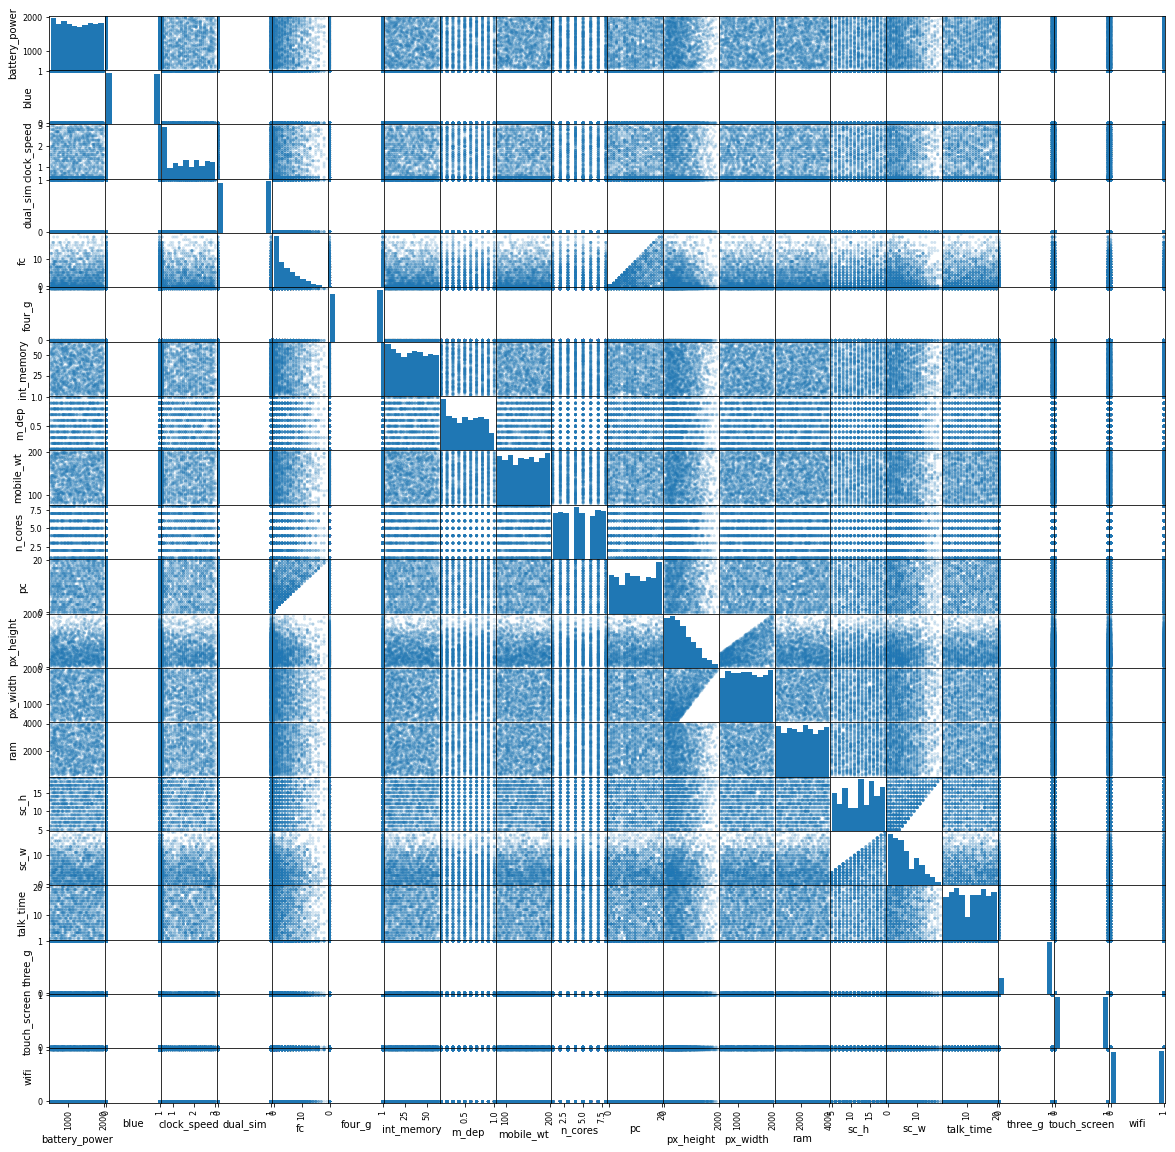

In [48]:
pandas.plotting.scatter_matrix(X, alpha=0.2, figsize=(20,20))

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
from sklearn import *
model_LR = linear_model.LinearRegression()
model_LR.fit(X_train, y_train)
model_Ridge = linear_model.Ridge()
model_Ridge.fit(X_train, y_train)
model_Lasso = linear_model.Lasso()
model_Lasso.fit(X_train, y_train)
model_SVM = svm.SVR()
model_SVM.fit(X_train, y_train)

tree_model = tree.DecisionTreeClassifier(max_depth=10)
tree_model.fit(X_train, y_train)

model_KNN = neighbors.KNeighborsClassifier()
model_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [51]:
y_pred_LR = model_LR.predict(X_test)
y_pred_Ridge = model_Ridge.predict(X_test)
y_pred_Lasso = model_Lasso.predict(X_test)
y_pred_SVM = model_SVM.predict(X_test)

y_pred_tree = tree_model.predict(X_test)
y_pred_KNN = model_KNN.predict(X_test)

In [54]:
metrics.mean_squared_error(y_test, y_pred_LR)

0.10390869976617562

In [55]:
metrics.mean_squared_error(y_test, y_pred_Ridge)

0.10390189731272093

In [56]:
metrics.mean_squared_error(y_test, y_pred_Lasso)

0.10372394757260482

In [57]:
metrics.mean_squared_error(y_test, y_pred_SVM)

0.06572653908330857

In [58]:
metrics.mean_squared_error(y_test, y_pred_tree)

0.20833333333333334

In [59]:
metrics.mean_squared_error(y_test, y_pred_KNN)

0.08166666666666667

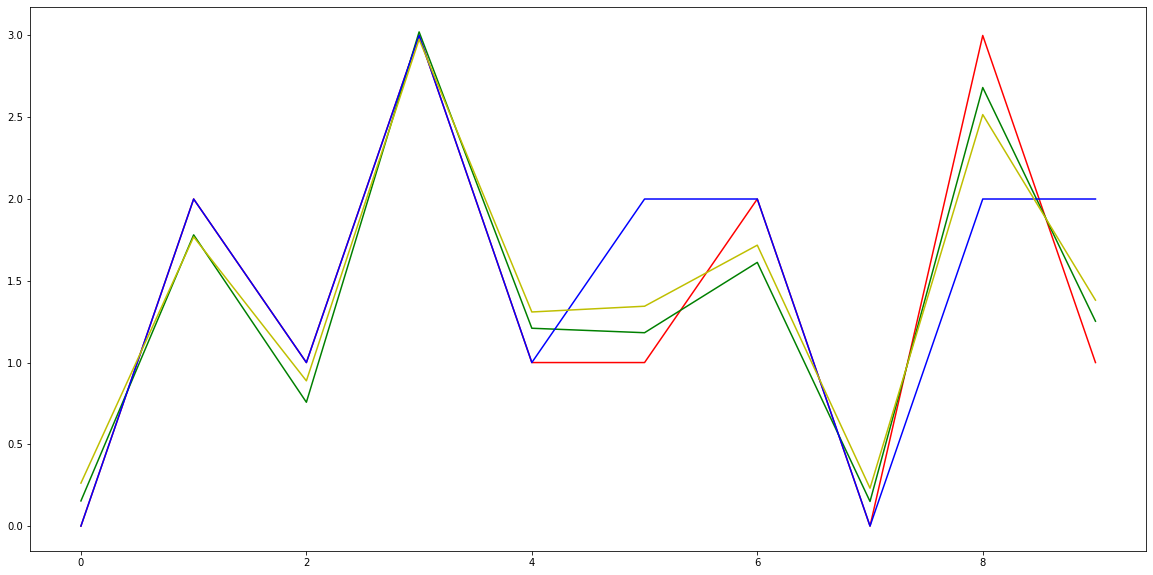

In [60]:
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_figwidth(20)
figure.set_figheight(10)
plt.plot(range(10), y_test[0:10], 'r') # plotting t, a separately 
plt.plot(range(10), y_pred_SVM[0:10], 'g') # plotting t, b separately 
plt.plot(range(10), y_pred_tree[0:10], 'b')
plt.plot(range(10), y_pred_LR[0:10], 'y')
plt.show()

In [61]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

rf = RandomForestRegressor(random_state=0)
cb = CatBoostRegressor()

rf.fit(X_train,y_train)
cb.fit(X_train,y_train)

predict_rf = rf.predict(X_test)
predict_cb = cb.predict(X_test)

Learning rate set to 0.043179
0:	learn: 1.0793945	total: 1.74ms	remaining: 1.74s
1:	learn: 1.0428219	total: 3.39ms	remaining: 1.69s
2:	learn: 1.0082994	total: 5.12ms	remaining: 1.7s
3:	learn: 0.9752452	total: 6.57ms	remaining: 1.64s
4:	learn: 0.9463538	total: 8.09ms	remaining: 1.61s
5:	learn: 0.9141985	total: 9.43ms	remaining: 1.56s
6:	learn: 0.8828633	total: 10.9ms	remaining: 1.55s
7:	learn: 0.8555886	total: 12.3ms	remaining: 1.52s
8:	learn: 0.8300547	total: 13.9ms	remaining: 1.53s
9:	learn: 0.8039879	total: 15.2ms	remaining: 1.51s
10:	learn: 0.7780698	total: 16.8ms	remaining: 1.51s
11:	learn: 0.7565592	total: 18.2ms	remaining: 1.5s
12:	learn: 0.7364450	total: 19.7ms	remaining: 1.5s
13:	learn: 0.7137730	total: 21.3ms	remaining: 1.5s
14:	learn: 0.6934963	total: 23ms	remaining: 1.51s
15:	learn: 0.6746286	total: 24.5ms	remaining: 1.5s
16:	learn: 0.6569955	total: 26ms	remaining: 1.5s
17:	learn: 0.6416467	total: 27.4ms	remaining: 1.49s
18:	learn: 0.6252551	total: 28.7ms	remaining: 1.48s
19

208:	learn: 0.2051176	total: 334ms	remaining: 1.26s
209:	learn: 0.2047221	total: 336ms	remaining: 1.26s
210:	learn: 0.2044717	total: 337ms	remaining: 1.26s
211:	learn: 0.2041107	total: 339ms	remaining: 1.26s
212:	learn: 0.2039199	total: 341ms	remaining: 1.26s
213:	learn: 0.2036185	total: 343ms	remaining: 1.26s
214:	learn: 0.2031181	total: 344ms	remaining: 1.26s
215:	learn: 0.2029245	total: 346ms	remaining: 1.25s
216:	learn: 0.2027575	total: 348ms	remaining: 1.25s
217:	learn: 0.2024091	total: 350ms	remaining: 1.25s
218:	learn: 0.2020151	total: 352ms	remaining: 1.25s
219:	learn: 0.2016957	total: 353ms	remaining: 1.25s
220:	learn: 0.2015268	total: 355ms	remaining: 1.25s
221:	learn: 0.2011586	total: 357ms	remaining: 1.25s
222:	learn: 0.2008166	total: 358ms	remaining: 1.25s
223:	learn: 0.2005434	total: 360ms	remaining: 1.25s
224:	learn: 0.2001837	total: 362ms	remaining: 1.25s
225:	learn: 0.1998281	total: 365ms	remaining: 1.25s
226:	learn: 0.1996346	total: 370ms	remaining: 1.26s
227:	learn: 

413:	learn: 0.1538695	total: 675ms	remaining: 956ms
414:	learn: 0.1534957	total: 678ms	remaining: 955ms
415:	learn: 0.1533267	total: 679ms	remaining: 954ms
416:	learn: 0.1530625	total: 681ms	remaining: 952ms
417:	learn: 0.1527357	total: 683ms	remaining: 951ms
418:	learn: 0.1525107	total: 685ms	remaining: 949ms
419:	learn: 0.1522351	total: 686ms	remaining: 948ms
420:	learn: 0.1519724	total: 688ms	remaining: 946ms
421:	learn: 0.1517342	total: 690ms	remaining: 945ms
422:	learn: 0.1515696	total: 692ms	remaining: 944ms
423:	learn: 0.1512918	total: 694ms	remaining: 942ms
424:	learn: 0.1512021	total: 695ms	remaining: 940ms
425:	learn: 0.1510029	total: 696ms	remaining: 938ms
426:	learn: 0.1508453	total: 698ms	remaining: 937ms
427:	learn: 0.1505488	total: 700ms	remaining: 935ms
428:	learn: 0.1503342	total: 701ms	remaining: 933ms
429:	learn: 0.1501063	total: 703ms	remaining: 932ms
430:	learn: 0.1498384	total: 704ms	remaining: 930ms
431:	learn: 0.1496582	total: 706ms	remaining: 928ms
432:	learn: 

611:	learn: 0.1164431	total: 1.01s	remaining: 644ms
612:	learn: 0.1162561	total: 1.02s	remaining: 643ms
613:	learn: 0.1161433	total: 1.02s	remaining: 641ms
614:	learn: 0.1160397	total: 1.02s	remaining: 640ms
615:	learn: 0.1158408	total: 1.02s	remaining: 638ms
616:	learn: 0.1156222	total: 1.02s	remaining: 636ms
617:	learn: 0.1154869	total: 1.03s	remaining: 635ms
618:	learn: 0.1153602	total: 1.03s	remaining: 633ms
619:	learn: 0.1151834	total: 1.03s	remaining: 632ms
620:	learn: 0.1150107	total: 1.03s	remaining: 631ms
621:	learn: 0.1148430	total: 1.04s	remaining: 630ms
622:	learn: 0.1147488	total: 1.04s	remaining: 628ms
623:	learn: 0.1146488	total: 1.04s	remaining: 626ms
624:	learn: 0.1144865	total: 1.04s	remaining: 625ms
625:	learn: 0.1143878	total: 1.04s	remaining: 623ms
626:	learn: 0.1141473	total: 1.04s	remaining: 621ms
627:	learn: 0.1139730	total: 1.05s	remaining: 620ms
628:	learn: 0.1138737	total: 1.05s	remaining: 618ms
629:	learn: 0.1137265	total: 1.05s	remaining: 616ms
630:	learn: 

811:	learn: 0.0895948	total: 1.35s	remaining: 314ms
812:	learn: 0.0895371	total: 1.36s	remaining: 312ms
813:	learn: 0.0894291	total: 1.36s	remaining: 311ms
814:	learn: 0.0892967	total: 1.36s	remaining: 309ms
815:	learn: 0.0891850	total: 1.36s	remaining: 307ms
816:	learn: 0.0890615	total: 1.36s	remaining: 306ms
817:	learn: 0.0889411	total: 1.36s	remaining: 304ms
818:	learn: 0.0888466	total: 1.37s	remaining: 302ms
819:	learn: 0.0887767	total: 1.37s	remaining: 301ms
820:	learn: 0.0886448	total: 1.37s	remaining: 299ms
821:	learn: 0.0884724	total: 1.37s	remaining: 298ms
822:	learn: 0.0883981	total: 1.38s	remaining: 296ms
823:	learn: 0.0883129	total: 1.38s	remaining: 294ms
824:	learn: 0.0881869	total: 1.38s	remaining: 293ms
825:	learn: 0.0881244	total: 1.38s	remaining: 291ms
826:	learn: 0.0880367	total: 1.38s	remaining: 289ms
827:	learn: 0.0879831	total: 1.38s	remaining: 288ms
828:	learn: 0.0878672	total: 1.39s	remaining: 286ms
829:	learn: 0.0877642	total: 1.39s	remaining: 284ms
830:	learn: 

In [62]:
metrics.mean_squared_error(y_test, predict_rf)

0.07904183333333334

In [63]:
metrics.mean_squared_error(y_test, predict_cb)

0.07745227860623402